In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

X = pd.read_csv( 'protein.csv' ) 
X = X.drop(['ID'], axis=1)
imputer = KNNImputer(n_neighbors=3) #k-nearest neighbors impute, 
X = imputer.fit_transform(X)

In [ ]:
X=pd.DataFrame(X)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X= scaler.fit_transform(X)
#X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9
0,-1.006417,0.882125,1.714778,-2.587934,1.715879,1.720692,-0.465769,1.135213,0.750321,0.627582
1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
2,-1.052577,-0.104960,1.550213,-2.576606,2.083175,2.015090,0.093019,0.959435,-0.263591,0.535906
3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909
...,...,...,...,...,...,...,...,...,...,...
489,-0.851538,-0.479357,2.271710,-1.820070,0.818096,0.141208,1.537069,0.314096,-0.341870,-1.010343
490,-1.610268,-0.184169,-0.100731,1.991430,-3.139705,4.407357,-0.010682,-1.208989,0.655864,1.034267
491,0.548784,-1.226596,1.755970,-3.334780,0.163496,1.993281,0.039038,1.018653,-1.410111,-0.662079
492,0.152008,-1.686879,1.489334,0.834950,-4.749197,-2.084045,-0.782886,-0.129883,0.496630,-1.550106


Drop all rows with z-wcore over 3

In [ ]:
from scipy import stats
z = pd.DataFrame(stats.zscore(X, axis=1, ddof=1))
indexNames = z[  (np.abs(z[0])>2.5) | (np.abs(z[1])>2.5) | (np.abs(z[2])>2.5) | (np.abs(z[3])>2.5) | (np.abs(z[4]) >2.5) | (np.abs(z[5])>2.5) | (np.abs(z[6])>2.5) | (np.abs(z[7])>2.5) | (np.abs(z[8])>2.5) | (np.abs(z[9])>2.5) ].index 
indexNames

Int64Index([ 17,  19,  59,  61,  63,  64,  68,  71,  75,  91,  92,  98, 112,
            124, 135, 136, 152, 153, 155, 158, 165, 173, 179, 196, 200, 204,
            205, 207, 208, 211, 213, 214, 224, 233, 235, 243, 250, 265, 273,
            279, 280, 286, 294, 304, 305, 315, 322, 326, 335, 345, 347, 352,
            357, 364, 369, 371, 383, 384, 387, 390, 399, 407, 408, 410, 411,
            418, 422, 443, 457, 465, 477, 482, 484, 485, 493],
           dtype='int64')

No need to remove any instances

In [ ]:
X = X.drop(indexNames )
X

,0,1,2,3,4,5,6,7,8,9
0,-1.006417,0.882125,1.714778,-2.587934,1.715879,1.720692,-0.465769,1.135213,0.750321,0.627582
1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
2,-1.052577,-0.104960,1.550213,-2.576606,2.083175,2.015090,0.093019,0.959435,-0.263591,0.535906
3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909
...,...,...,...,...,...,...,...,...,...,...
488,1.308182,-0.743505,0.483344,-5.582024,0.200337,-2.903750,0.085492,-1.746900,0.910038,2.292125
489,-0.851538,-0.479357,2.271710,-1.820070,0.818096,0.141208,1.537069,0.314096,-0.341870,-1.010343
490,-1.610268,-0.184169,-0.100731,1.991430,-3.139705,4.407357,-0.010682,-1.208989,0.655864,1.034267
491,0.548784,-1.226596,1.755970,-3.334780,0.163496,1.993281,0.039038,1.018653,-1.410111,-0.662079


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.array(X[1])
y = np.array(X[2])


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

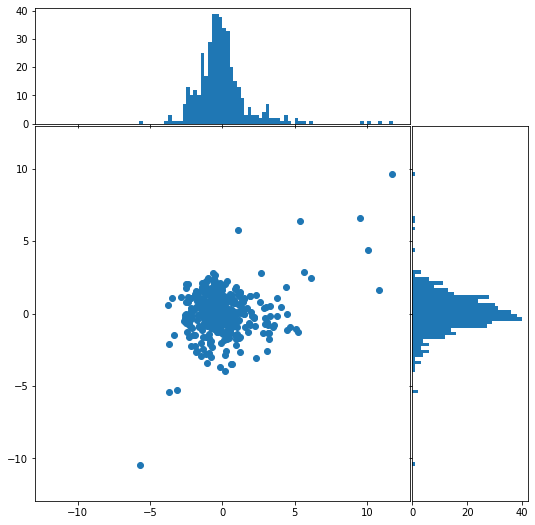

In [ ]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5,  covariance_type='tied', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

gm = gm.fit(X)

gm.means_

array([[-6.05277171e-01, -5.94689942e-01, -5.82913675e-01,
         1.23282387e+00, -2.71028927e+00,  2.98464230e+00,
        -2.11596858e-01, -8.49244209e-01,  1.09987723e+00,
         3.05339261e-01],
       [ 1.66062915e-01, -5.05532988e-01, -7.56662072e-02,
         4.07766555e+00, -1.54526709e+00, -8.31201427e-01,
         3.72661610e-01,  8.10230777e-01, -1.06752962e+00,
         6.76592331e-01],
       [-4.34695204e-01, -1.31699810e-01, -1.18213254e-01,
         2.17060707e+00,  3.52350082e+00, -1.21944580e+00,
        -2.98691023e-01, -7.44156585e-01,  5.20732762e-01,
        -4.21377917e-01],
       [ 1.05474250e+01,  8.46564028e+00,  4.86816100e+00,
         6.32393779e+00, -1.27552234e+00,  2.35446208e+00,
         2.04671776e+00, -2.99616788e-01,  2.30488600e+00,
        -1.55660533e+00],
       [-5.09607325e-02,  2.37734522e-01,  2.25874532e-01,
        -2.90510788e+00,  3.54392248e-02,  1.65844340e-01,
        -1.05429262e-02,  2.88527040e-01, -1.41688381e-02,
        -1.

Visualize using principal component analysis
3 dim

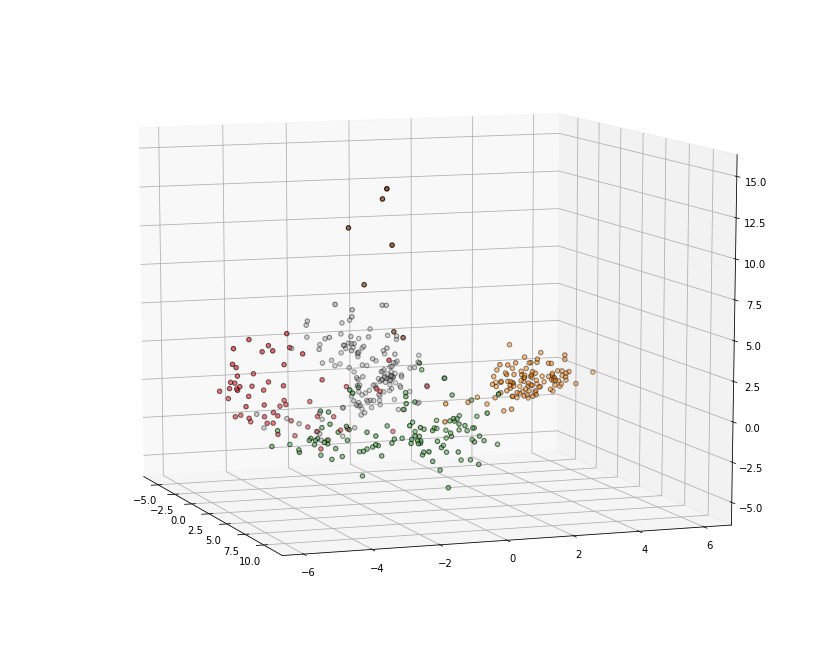

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

np.random.seed(5)

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=-20)

y = gm.predict(X) #labels

pca = decomposition.PCA(n_components=3)
X_new = pca.fit_transform(X)

ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y,cmap=plt.cm.get_cmap('Set1', 5),
           edgecolor='k')



plt.show()

2 dim PCA

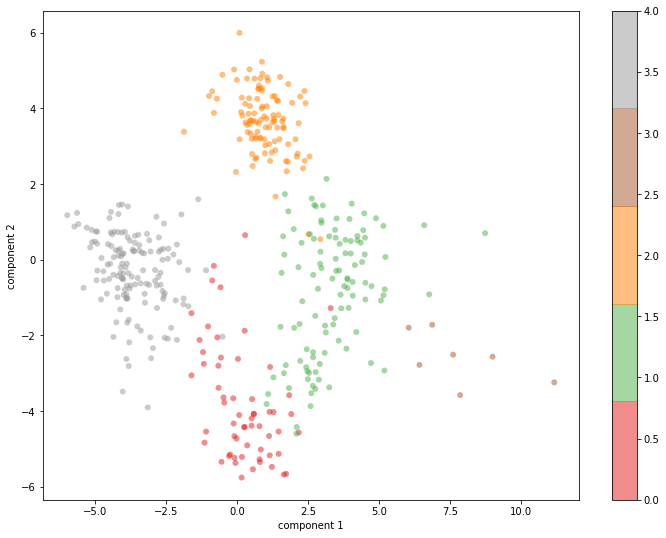

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition

np.random.seed(5)

fig = plt.figure(1, figsize=(12, 9))

y = gm.predict(X) #labels

pca = decomposition.PCA(n_components=2)
X_2 = pca.fit_transform(X)
plt.scatter(X_2[:, 0], X_2[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Set1', 5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
y

array([4, 4, 4, 4, 1, 2, 2, 4, 1, 0, 1, 4, 4, 4, 2, 2, 4, 1, 4, 4, 1, 4,
       1, 2, 4, 2, 0, 0, 0, 0, 4, 2, 0, 1, 4, 4, 4, 2, 2, 3, 4, 1, 1, 1,
       2, 4, 4, 2, 1, 0, 4, 4, 4, 1, 1, 2, 2, 4, 2, 4, 1, 4, 0, 1, 2, 4,
       1, 4, 4, 4, 0, 1, 2, 4, 2, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 0, 2, 2,
       4, 4, 2, 4, 1, 0, 1, 2, 2, 0, 1, 4, 2, 4, 4, 0, 2, 0, 4, 1, 2, 2,
       2, 4, 1, 4, 2, 4, 0, 2, 4, 0, 4, 1, 1, 2, 4, 4, 1, 1, 0, 2, 4, 0,
       1, 1, 0, 4, 3, 1, 4, 0, 4, 4, 4, 2, 4, 2, 1, 3, 4, 4, 2, 0, 1, 4,
       1, 0, 1, 2, 1, 2, 1, 2, 2, 4, 4, 1, 1, 2, 4, 4, 4, 4, 2, 1, 1, 2,
       2, 0, 1, 4, 0, 0, 4, 4, 2, 2, 4, 4, 2, 1, 2, 4, 1, 2, 0, 0, 4, 0,
       1, 1, 2, 2, 2, 2, 4, 1, 1, 0, 0, 4, 4, 0, 4, 4, 2, 4, 1, 1, 2, 4,
       4, 0, 2, 4, 2, 2, 4, 4, 0, 0, 1, 1, 0, 1, 4, 4, 4, 4, 1, 1, 2, 2,
       4, 0, 2, 2, 4, 1, 1, 1, 2, 4, 4, 0, 2, 4, 4, 1, 4, 1, 1, 4, 2, 1,
       2, 1, 4, 0, 4, 1, 4, 2, 1, 1, 2, 1, 4, 4, 2, 2, 1, 2, 4, 1, 4, 0,
       2, 1, 1, 0, 4, 2, 4, 0, 1, 0, 4, 4, 2, 3, 3,

In [ ]:
gm.score(X)

-17.896040083698548

Check best number of components is actually 5 as required and figure out best covariance_type argument using BIC score

In [ ]:
lowest_bic = np.infty
bic = []
n_components_range = range(4, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [ ]:
best_gmm.get_params

<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)>

In [ ]:
df = pd.DataFrame(gm.means_) #centriods
df

,0,1,2,3,4,5,6,7,8,9
0,-0.605277,-0.594690,-0.582914,1.232824,-2.710289,2.984642,-0.211597,-0.849244,1.099877,0.305339
1,0.166063,-0.505533,-0.075666,4.077666,-1.545267,-0.831201,0.372662,0.810231,-1.067530,0.676592
2,-0.434695,-0.131700,-0.118213,2.170607,3.523501,-1.219446,-0.298691,-0.744157,0.520733,-0.421378
3,10.547425,8.465640,4.868161,6.323938,-1.275522,2.354462,2.046718,-0.299617,2.304886,-1.556605
4,-0.050961,0.237735,0.225875,-2.905108,0.035439,0.165844,-0.010543,0.288527,-0.014169,-0.122878


In [ ]:
gm.lower_bound_ #lower bond on likelihood

-17.8962607274882

In [ ]:
gm.covariances_

array([[ 2.0110472 , -0.37519709, -0.7127961 ,  0.01469076,  0.58009274,
         0.15454969, -0.15134673,  0.30665307,  0.29879422, -0.00907229],
       [-0.37519709,  2.16025991,  0.05063661,  0.29952397, -0.19988284,
        -0.21499438, -0.5427406 , -0.12457992, -0.2744404 ,  0.09039071],
       [-0.7127961 ,  0.05063661,  1.90876312, -0.24169883, -0.28289554,
        -0.10184005, -0.07302191, -0.36710258, -0.42353076, -0.13224957],
       [ 0.01469076,  0.29952397, -0.24169883,  0.98874905,  0.27053794,
         0.65406008,  0.21604365,  0.10103445,  0.05596216, -0.0773917 ],
       [ 0.58009274, -0.19988284, -0.28289554,  0.27053794,  1.69397842,
         0.91632127, -0.23222144,  0.40471187, -0.01667545,  0.20934311],
       [ 0.15454969, -0.21499438, -0.10184005,  0.65406008,  0.91632127,
         3.75292613,  0.09832202, -0.20320233, -0.6823542 ,  0.06241791],
       [-0.15134673, -0.5427406 , -0.07302191,  0.21604365, -0.23222144,
         0.09832202,  2.86789904,  0.07863555

In [ ]:
gm.weights_ #P(y_i)

array([0.14242411, 0.25272866, 0.24869685, 0.01670633, 0.33944404])

similarity within virus mutations

In [ ]:
#similarity within virus mutation

Spectral Clustering
Apply clustering to a projection of the normalized Laplacian.

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plane.

In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np

clustering = SpectralClustering(n_clusters=5,
        assign_labels="discretize",
        random_state=0).fit(X)

clustering

SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=5, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=0)

visualize using principal component analysis

plot covariance matrix for each component and calculate determinant of each covariance matrix

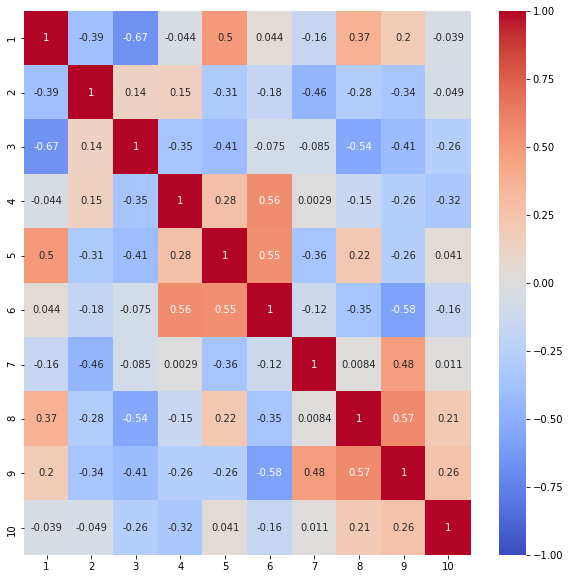

In [ ]:
#importing all the libraries needed
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_new = pd.DataFrame(gm.covariances_) #covariance matrix with diagonal cv
df_new = df_new.rename(columns={0: 1, 1: 2, 2: 3, 3:4,4:5,5:6,6:7,7:8,8:9,9:10})
fig, ax = plt.subplots(figsize=(10,10)) #resize
sns.heatmap(df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


negative correltion (1,3)


> Indented block

postive correlation (1,5), (8,9)

Determine 5 most important features for descriminating mutation groups:

1.principal component analysis

with scoring function f1 score on test  set

used https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e section 7 Feature Importance


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
comp= pd.DataFrame(np.abs(pca.components_))
comp = comp.rename(columns={0: 1, 1: 2, 2: 3, 3:4,4:5,5:6,6:7,7:8,8:9,9:10})

In [ ]:
comp #matrix of entries of 5 principal components of the decomposition

,1,2,3,4,5,6,7,8,9,10
0,0.184070,0.070664,0.013771,0.971821,0.056322,0.028007,0.096991,0.026441,0.026883,0.041400
1,0.018053,0.013117,0.036170,0.051566,0.820470,0.548086,0.115713,0.010004,0.052647,0.075522
2,0.520500,0.376402,0.093974,0.068073,0.408022,0.608278,0.050273,0.082139,0.129948,0.106265
3,0.446509,0.514427,0.258918,0.159806,0.326635,0.545987,0.083956,0.133144,0.104982,0.053182
4,0.260165,0.354123,0.292324,0.079348,0.036274,0.012480,0.582023,0.241101,0.554519,0.096533


In first PC, feature 4 is most important


> 


In second PC, features 5,6 most important (in order)


> 





In third PC, features 6,1,5 (in order) ""


> 

In fourth PCA features 6,2,1 (in order) most important



In summary, features 4,5,6,1,2